     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.2 MB/s eta 0:00:0000:0100:01


In [5]:
#import section
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [6]:
#read section
df=pd.read_excel('dataset/random_forest_dataset.xlsx')
df=df.dropna()
df=df.iloc[1:]
df = df.rename(columns={'Unnamed: 4': 'A','Unnamed: 5': 'B','Unnamed: 6': 'C','Unnamed: 7': 'D','Unnamed: 8': 'E','Unnamed: 9': 'F','Unnamed: 10': 'G','Unnamed: 11': 'H','Unnamed: 12': 'I','Unnamed: 13': 'J','Unnamed: 14': 'Grade'})
#df.drop('Unnamed: 0',inplace=True)
#df.to_csv('ProcessedRF.csv')
df[['A','B','C','D','E','F','G','H','I','J']]=df[['A','B','C','D','E','F','G','H','I','J']].astype(str).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 1 to 117
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  109 non-null    object 
 1   Unnamed: 1  109 non-null    object 
 2   Unnamed: 2  109 non-null    object 
 3   Unnamed: 3  109 non-null    object 
 4   A           109 non-null    float64
 5   B           109 non-null    float64
 6   C           109 non-null    float64
 7   D           109 non-null    float64
 8   E           109 non-null    float64
 9   F           109 non-null    float64
 10  G           109 non-null    float64
 11  H           109 non-null    float64
 12  I           109 non-null    float64
 13  J           109 non-null    float64
 14  Grade       109 non-null    object 
dtypes: float64(10), object(5)
memory usage: 13.6+ KB


In [7]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,A,B,C,D,E,F,G,H,I,J,Grade
1,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78.0,15.6,85.0,34.0,93.0,18.6,13.0,4.0,35.6,85.2,A
2,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84.0,16.8,82.0,32.8,77.0,15.4,15.0,5.0,35.4,85.0,A
3,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84.0,16.8,82.0,32.8,88.0,17.6,13.0,1.0,31.6,81.2,A
4,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88.0,17.6,85.0,34.0,96.0,19.2,13.0,4.0,36.2,87.8,A
5,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84.0,16.8,82.0,32.8,77.0,15.4,15.0,5.0,35.4,85.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,112,1RV21MC117,VIPUL TIWARI,Quality Management in High Voltage Constructio...,70.0,14.0,76.0,30.4,78.0,15.6,12.0,4.0,31.6,76.0,B
113,114,1RV21MC119,Y S KIRAN KUMAR,Text Summarization Using NLP,92.0,18.4,90.0,36.0,94.0,18.8,13.0,4.0,35.8,90.2,S
114,115,1RV21MC120,YATHISH L,Immersive Virtual Reality walkthrough of MCA D...,100.0,20.0,100.0,40.0,100.0,20.0,15.0,5.0,40.0,100.0,S
115,116,1RV20MC031,KAVITHA M,IoT - Gateway dashboard for Greenhouse Automat...,87.0,17.4,92.0,36.8,92.0,18.4,14.0,5.0,37.4,91.6,S


In [8]:
#pre-process section
df=df.dropna()
df.info()
#df.drop("Name")
#df=df.select_dtypes(include=["number"])


<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 1 to 117
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  109 non-null    object 
 1   Unnamed: 1  109 non-null    object 
 2   Unnamed: 2  109 non-null    object 
 3   Unnamed: 3  109 non-null    object 
 4   A           109 non-null    float64
 5   B           109 non-null    float64
 6   C           109 non-null    float64
 7   D           109 non-null    float64
 8   E           109 non-null    float64
 9   F           109 non-null    float64
 10  G           109 non-null    float64
 11  H           109 non-null    float64
 12  I           109 non-null    float64
 13  J           109 non-null    float64
 14  Grade       109 non-null    object 
dtypes: float64(10), object(5)
memory usage: 13.6+ KB


In [9]:
#feature selection
ip=df.select_dtypes(include=["number"])
ip=df[["J","D","C","B"]]
tar=df['Grade']
len(ip)

109

In [10]:
# train-test split
#15--> best random state for test data
#46--> best random state for train data
#22--> used state for experiment

#train_test_split(ip,tar,test_size=0.2,random_state= 22)
iptrain,iptest,tartrain,tartest=train_test_split(ip,tar,test_size=0.2,random_state= 15)

In [11]:
#create model and train data
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[0,2,4]
}
grid_search=GridSearchCV(RandomForestClassifier(random_state=15),param_grid,cv=5,n_jobs=10)
grid_search.fit(iptrain,tartrain)
best_param=grid_search.best_params_
model = RandomForestClassifier(**best_param,random_state=15)
model.fit(iptrain, tartrain)

/home/ma1581/Downloads/debian/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


/home/ma1581/Downloads/debian/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ma1581/Downloads/debian/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ma1581/Downloads/debian/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/ma1581/Dow

RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=50,
                       random_state=15)

In [12]:
#model purity/accuracy
model.score(iptrain,tartrain)

0.8505747126436781

In [13]:
#model accuracy on test data
tarpred=model.predict(iptest)
print("Accuracy=",accuracy_score(tartest,tarpred))

Accuracy= 0.7727272727272727


<Axes: >

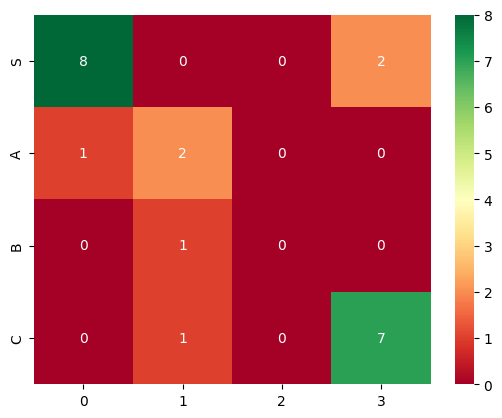

In [14]:
#confusion matrix on test data 
confmattest=confusion_matrix(tartest,tarpred)
sns.heatmap(confmattest,cmap='RdYlGn',annot=True,yticklabels=['S','A','B','C'])

In [15]:
#model accuracy on custom data
cusip=[[82,45,17,93]]
res=model.predict(cusip)
print(res)

['A']


/home/ma1581/Downloads/debian/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: ylabel='None'>

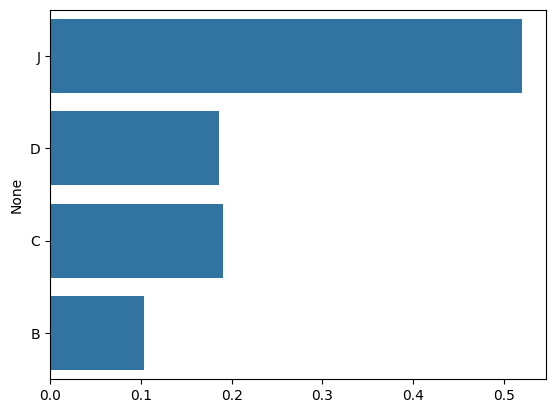

In [16]:
feature=model.feature_importances_
sns.barplot(x=feature,y=ip.columns)